### Train Test Split Set

In [37]:
def train_test_split(df, perc):
    shuffle_df = df.sample(frac=1)                                                     #Shuffling the rows of the dataframe
    train_size = int(perc * len(df))                                                   #Setting size of training set
    
    train_set = shuffle_df[:train_size]                                                #Slicing dataframe for training set  
    test_set = shuffle_df[train_size:]                                                 #Slicing dataframe for testing set  
    
    return train_set, test_set

### Distance Matrix Calculation

In [38]:
def euclidian_distance_matrix(train, test):
    M = train_array.shape[0]                            #Assigning variables for number of rows of train_x and test_x datasets
    N = test_array.shape[0]
    
    train_array_dots = (train*train).sum(axis=1).reshape((M,1))*np.ones(shape=(1,N))
    
    test_array_dots = (test*test).sum(axis=1)*np.ones(shape=(M,1))
    
    test_train_dot = -2*train.dot(test.T)
    
    distance = train_array_dots + test_array_dots + test_train_dot
    distance_array = np.sqrt(distance)
    
    return distance_array

### KNN Regression Algorithm

In [39]:
def knn_regress(matrix, knn):
    nn_indices = np.argsort(matrix, axis=0)[:knn:]    #Getting the corresponding indices of the elements of sorted distance matrix in original distance matrix  
    nn_indices = pd.DataFrame(nn_indices)
    
    pred = pd.DataFrame(np.zeros((len(test_y),1)))                        #Creating a zero matrix of the same size as test_y
    
    for i, j in nn_indices.iteritems():             #Calculating sum of k-nearest neighbors and storing it in pred dataframe
        sum = 0.0
        for k in j:
            sum = sum + train_y.iloc[k,0]
        a = np.array(sum/knn)
        pred.iloc[i,0] = a
    
    return pred

### Data Preprocessing

In [40]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv('Train_BigMart - Train_BigMart.csv')             #To read the file as a dataframe from onto the notebook
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:
df.shape                                                                                     #No. of rows and columns

(8523, 12)

In [43]:
df.info()                                                                                  #Checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [44]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [45]:
df.rename(columns = lambda x: x.lower(), inplace=True)                  #Changing column names to lowercase for covenience

In [46]:
df['item_weight'].fillna(df['item_weight'].mean(), inplace=True)                                  #Filling missing values
outlet_size_mode = df['outlet_size'].mode()
df['outlet_size'].fillna(outlet_size_mode[0], inplace=True)

In [47]:
df.drop(columns = ['item_identifier','outlet_identifier','outlet_establishment_year'], inplace=True) #Dropping irrelevant columns

In [48]:
df.item_fat_content.unique()                                                #Checking unique values of item_fat_content

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [49]:
df.item_fat_content.replace(['low fat','LF','reg'], ['Low Fat','Low Fat','Regular'], inplace=True)  #Replacing duplicate values 

In [50]:
df = pd.get_dummies(df)                                      #Creating dummy variables for columns with categorical data

In [51]:
scaling_cols = df[['item_weight','item_visibility','item_mrp']]            #Creating a sliced dataframe of numeric columns

In [52]:
def scaling(data):                                                         #Creating function for nowmalizing using MinMaxScaler
    for col in data:
        data[col]= (data[col] - min(data[col])) / (max(data[col]) - min(data[col])) 
    return data

In [53]:
scaling(scaling_cols)                                                      #Normalizing the data

<ipython-input-52-3865732f5db5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]= (data[col] - min(data[col])) / (max(data[col]) - min(data[col]))


,item_weight,item_visibility,item_mrp
0,0.282525,0.048866,0.927507
1,0.081274,0.058705,0.072068
2,0.770765,0.051037,0.468288
3,0.871986,0.000000,0.640093
4,0.260494,0.000000,0.095805
...,...,...,...
8518,0.137541,0.172914,0.777729
8519,0.227746,0.143069,0.326263
8520,0.359929,0.107148,0.228492
8521,0.158083,0.442219,0.304939


In [54]:
df['item_weight_scaled'] = scaling_cols['item_weight']            #Adding normalised columns to original dataframe and dropping original columns
df['item_visibility_scaled'] = scaling_cols['item_visibility']
df['item_mrp_scaled'] = scaling_cols['item_mrp']

df.drop(columns = ['item_weight','item_visibility','item_mrp'], inplace=True)

In [55]:
df.head()

,item_outlet_sales,item_fat_content_Low Fat,item_fat_content_Regular,item_type_Baking Goods,item_type_Breads,item_type_Breakfast,item_type_Canned,item_type_Dairy,item_type_Frozen Foods,item_type_Fruits and Vegetables,...,outlet_location_type_Tier 1,outlet_location_type_Tier 2,outlet_location_type_Tier 3,outlet_type_Grocery Store,outlet_type_Supermarket Type1,outlet_type_Supermarket Type2,outlet_type_Supermarket Type3,item_weight_scaled,item_visibility_scaled,item_mrp_scaled
0,3735.1380,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0.282525,0.048866,0.927507
1,443.4228,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0.081274,0.058705,0.072068
2,2097.2700,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0.770765,0.051037,0.468288
3,732.3800,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0.871986,0.000000,0.640093
4,994.7052,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0.260494,0.000000,0.095805


### Algorithm Implementation

In [59]:
train_set, test_set = train_test_split(df, 0.7)

In [60]:
train_x = train_set.drop(columns = 'item_outlet_sales')                            #Slicing training set for independent variables
train_y = pd.DataFrame(train_set['item_outlet_sales'])                             #Slicing training set for dependent variables
    
test_x = test_set.drop(columns = 'item_outlet_sales')                              #Slicing testing set for independent variables
test_y = pd.DataFrame(test_set['item_outlet_sales'])                               #Slicing testing set for independent variables

In [61]:
train_array = np.array(train_x)
test_array = np.array(test_x)

In [62]:
distance_matrix = euclidian_distance_matrix(train_array, test_array)

In [63]:
distance_matrix.shape

(5966, 2557)

In [64]:
predicted = knn_regress(distance_matrix, 77)

In [65]:
predicted.shape

(2557, 1)

In [66]:
test_y_array = pd.DataFrame.to_numpy(test_y)
pred_array = pd.DataFrame.to_numpy(predicted)

In [29]:
error = np.mean(abs(test_y_array - pred_array))                                       #Calculating Mean Absolute Error
error

918.6442971389972

### K-Fold Cross Validation

In [67]:
error_list = []
knn_list = []
for knn in range(int(np.sqrt(len(train_x)))):
    knn = knn + 1
    
    predicted = knn_regress(distance_matrix, knn)
    
    test_y_array = pd.DataFrame.to_numpy(test_y)
    pred_array = pd.DataFrame.to_numpy(predicted)
    
    error = np.mean(abs(test_y_array - pred_array))                                       #Calculating Mean Absolute Error
    error_list.append(error)
    knn_list.append(knn)

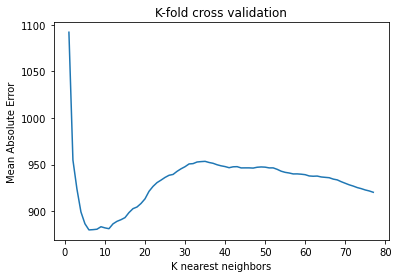

In [68]:
import matplotlib.pyplot as plt
plt.plot(knn_list, error_list)
plt.title('K-fold cross validation')
plt.xlabel('K nearest neighbors')
plt.ylabel('Mean Absolute Error')
plt.show()